In [1]:
import pandas as pd
import numpy as np
import matplotlib as mp
import matplotlib.pyplot as plt
from struct import *
import time
%matplotlib inline

## Time

In [2]:
a=0
b=1
dt=0.1

In [3]:
i=b-0.1
file = open('test_'+str(i),"rb")
data = file.read(16)
format = "2d"
sizeRow, sizeCol = unpack(format, data)
sizeRow = int(sizeRow)
sizeCol = int(sizeCol)
data = file.read(sizeRow*sizeCol*8)
format = str(sizeRow*sizeCol)+"d"
data = np.array(unpack(format,data))
vmax=max(data)
vmin=-vmax

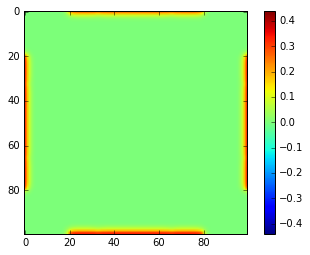

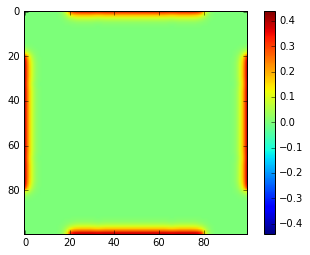

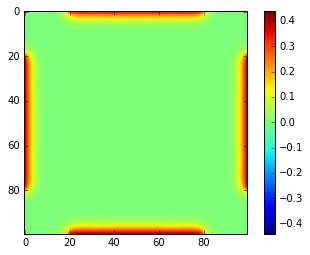

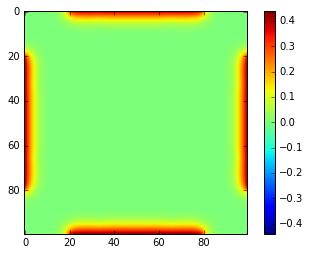

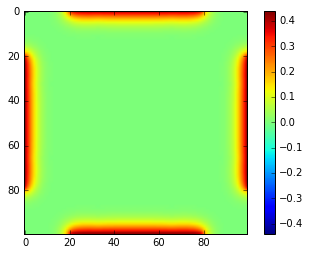

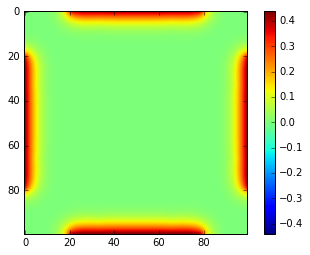

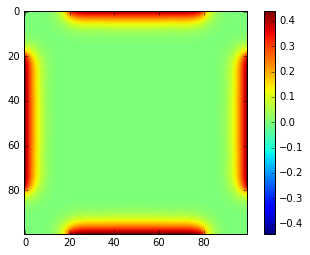

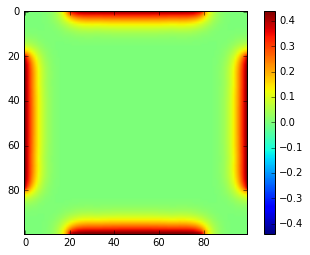

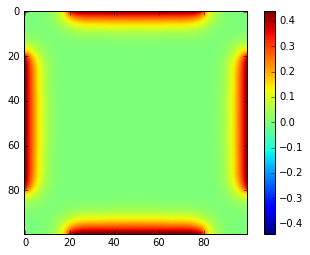

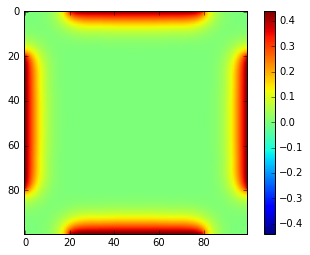

In [4]:
for i in np.linspace(a+dt,b,float(b-a)/dt):
    file = open('test_'+str(i),"rb")
    data = file.read(16)
    format = "2d"
    sizeRow, sizeCol = unpack(format, data)
    sizeRow = int(sizeRow)
    sizeCol = int(sizeCol)
    data = file.read(sizeRow*sizeCol*8)
    format = str(sizeRow*sizeCol)+"d"
    data = np.array(unpack(format,data))
    data = data.reshape((sizeCol,sizeRow))
    heatmap = plt.imshow(data, vmin=vmin, vmax=vmax)
    bar = plt.colorbar(heatmap)
    plt.show()

## Data

In [5]:
data1 = pd.read_csv('Data_1/time1.csv',sep=',')
del data1['Unnamed: 5']
for i in ['2','3','4','5','6','7','8','9','10']:
    dataTmp = pd.read_csv('Data_1/time'+i+'.csv',sep=',')
    del dataTmp['Unnamed: 5']
    data1 = data1 + dataTmp
data1 = data1 / 10
data1

,seq,1,2,3,4
10,1285441.9,816.7,18119.6,2900750.2,5544795.8
100,38390.7,15962.7,28343.1,2863443.2,5206066.3
500,701655.1,254720.3,408445.3,3026756.4,5552984.2
1000,3064497.6,1012446.4,1226895.7,3237505.5,5863876.1
3000,26448643.0,9450610.6,9039958.3,9357354.9,10873001.3
5000,77910921.0,31479357.9,29843961.2,30903624.7,31044395.1


In [6]:
x = [1,2,3,4]
del data1['seq']
matrix1 = data1.as_matrix()

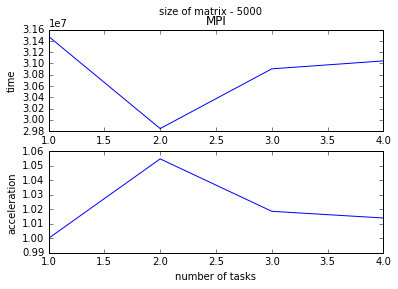

In [7]:
for i in range(0,6):
    plt.clf()
    plt.subplot(2,1,1)
    plt.plot(x,matrix1[i])
    plt.title('MPI')
    #plt.xlabel("number of threads")
    plt.ylabel("time")
    
    plt.subplot(2,1,2)
    plt.plot(x,matrix1[i][0]/matrix1[i])
    #plt.title("size of matrix - "+time.axes[1][i])
    plt.xlabel("number of tasks")
    plt.ylabel("acceleration")
    
    plt.suptitle("size of matrix - "+str(data1.T.axes[1][i]))
    plt.draw()
    plt.savefig('Graphs/size='+str(data1.T.axes[1][i])+'.png', dpi=200)

In [8]:
matrix1=matrix1.T

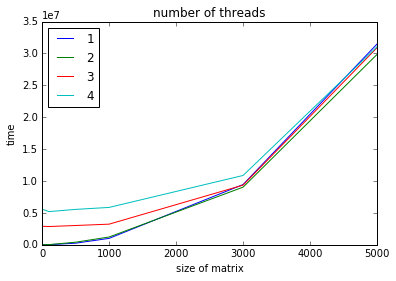

In [10]:
labels = ['1','2','3','4']
x = [10,100,500,1000,3000,5000]
for i in range(0,4):
    plt.plot(x,matrix1[i],label=labels[i])
    plt.title("number of threads")
    plt.xlabel("size of matrix")
    plt.ylabel("time")
    plt.legend(loc="upper left")
plt.draw()
plt.savefig('Graphs/threads', dpi=200)